In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston_data = pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [5]:
boston_data['target_price'] = boston['target']

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target_price'],
      dtype='object')

In [9]:
x = boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [10]:
y = boston_data[['target_price']]

In [11]:
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.4)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
print(lm.intercept_)

[31.18283037]


In [16]:
lm.coef_

array([[-1.56349180e-01,  4.91121163e-02, -3.27829683e-03,
         2.27682423e+00, -1.11250809e+01,  3.82229561e+00,
        -5.40832078e-03, -1.47100335e+00,  3.11982935e-01,
        -1.34461946e-02, -8.92492335e-01,  1.31781444e-02,
        -5.15823208e-01]])

In [17]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])

ValueError: Shape of passed values is (1, 13), indices imply (13, 1)

In [18]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
pridiction = lm.predict(x_test)

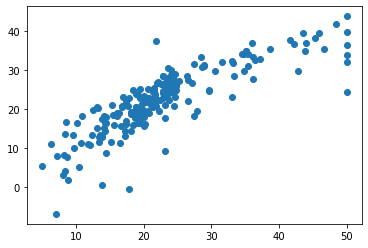

In [27]:
plt.scatter(y_test,pridiction)

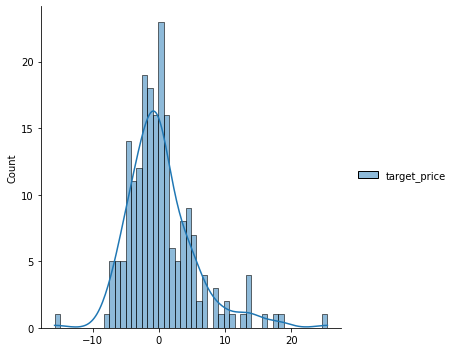

In [21]:
sns.displot(y_test-pridiction,bins=50,kde=True)

In [22]:
from sklearn import metrics

In [23]:
metrics.mean_absolute_error(y_test,pridiction)

3.6362178850290974

In [24]:
metrics.mean_squared_error(y_test,pridiction)

27.280029147765305

In [25]:
np.sqrt(metrics.mean_squared_error(y_test,pridiction))

5.223028733193539